In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import UpSampling2D, LeakyReLU

Using TensorFlow backend.


In [0]:
## Load data
from keras.datasets import mnist

In [0]:
## Input image dimensions
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

In [4]:
## The data, shuffled and split between train and test sets
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
noise_factor = 0.5

X_train_noisy = X_train + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, 
                                                          size = X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, 
                                                        size = X_test.shape)

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

In [6]:
print(X_train.shape[0], ' training samples')
print(X_test.shape[0], ' test samples')

60000  training samples
10000  test samples


In [0]:
def DAE_CNN(features_shape, act = 'relu'):
  
  #Input
  x = Input(name = 'inputs', shape = features_shape, dtype = 'float32')
  o = x
  
  
  #Encoder
  o = Conv2D(32, (3, 3), activation = act, padding = 'same',
             strides = (1, 1), name = 'en_conv1')(o)
  o = MaxPooling2D((2, 2), strides = (2, 2), padding = 'same',
                   name = 'en_pool1')(o)
  o = Conv2D(32, (3, 3), activation = act, padding = 'same',
             strides = (1, 1), name = 'en_conv2')(o)
  enc = MaxPooling2D((2, 2), strides = (2, 2), padding = 'same',
                     name = 'en_pool2')(o)
  
  
  #Decoder
  o = Conv2D(32, (3, 3), activation = act, padding = 'same',
             strides = (1, 1), name = 'de_conv1')(enc)
  o = UpSampling2D((2, 2), name = 'upsampling1')(o)
  o = Conv2D(32, (3, 3), activation = act, padding = 'same',
             strides = (1, 1), name = 'de_conv2')(o)
  o = UpSampling2D((2, 2), name = 'upsampling2')(o)
  dec = Conv2D(1, (3, 3), activation = 'sigmoid', padding = 'same',
               strides = (1, 1), name = 'de_conv3')(o)
  
  
  #Print network summary
  Model(inputs = x, outputs = dec).summary()
  
  return Model(inputs = x, outputs = dec)

In [8]:
batch_size = 128
epochs = 40

autoencoder = DAE_CNN(input_shape, act = LeakyReLU(alpha = 0.1))
autoencoder.compile(optimizer = 'adadelta', 
                    loss = 'binary_crossentropy')

autoencoder.fit(X_train_noisy, X_train,
                epochs = epochs,
                batch_size = batch_size,
                shuffle = True,
                validation_data = (X_test_noisy, X_test))

decoded_imgs = autoencoder.predict(X_test_noisy)

W0902 19:14:11.957674 139940059129728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0902 19:14:11.998645 139940059129728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))
W0902 19:14:12.005703 139940059129728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.ran

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 28, 28, 1)         0         
_________________________________________________________________
en_conv1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
en_pool1 (MaxPooling2D)      (None, 14, 14, 32)        0         
_________________________________________________________________
en_conv2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
en_pool2 (MaxPooling2D)      (None, 7, 7, 32)          0         
_________________________________________________________________
de_conv1 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
upsampling1 (UpSampling2D)   (None, 14, 14, 32)        0   

W0902 19:14:12.452394 139940059129728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 10s 173us/step - loss: 0.1725 - val_loss: 0.1222
Epoch 2/40
60000/60000 [==============================] - 4s 64us/step - loss: 0.1175 - val_loss: 0.1102
Epoch 3/40
60000/60000 [==============================] - 4s 64us/step - loss: 0.1101 - val_loss: 0.1064
Epoch 4/40
60000/60000 [==============================] - 4s 65us/step - loss: 0.1065 - val_loss: 0.1054
Epoch 5/40
60000/60000 [==============================] - 4s 64us/step - loss: 0.1044 - val_loss: 0.1040
Epoch 6/40
60000/60000 [==============================] - 4s 64us/step - loss: 0.1031 - val_loss: 0.1037
Epoch 7/40
60000/60000 [==============================] - 4s 65us/step - loss: 0.1021 - val_loss: 0.0999
Epoch 8/40
60000/60000 [==============================] - 4s 65us/step - loss: 0.1014 - val_loss: 0.1004
Epoch 9/40
60000/60000 [==============================] - 4s 65us/step - loss: 0.1008 - val_loss: 0.1000
Epo

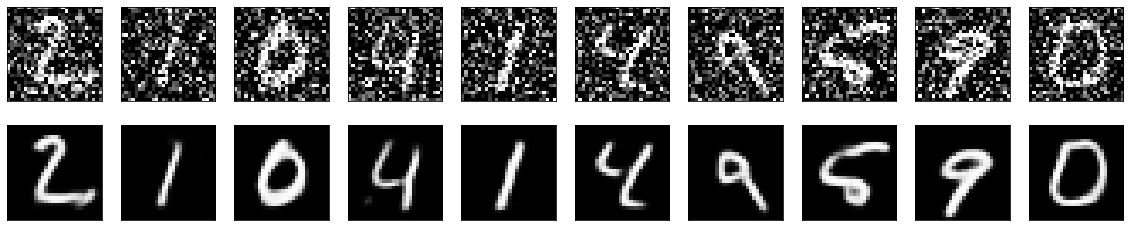

In [9]:
n = 10

plt.figure(figsize = (20, 4))

for i in range(1, n + 1):
  ##Displaying original images
  ax = plt.subplot(2, n, i)
  plt.imshow(X_test_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
  ##Displaying reconstructed images
  ax = plt.subplot(2, n, i + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()